# Section 13 — Robust Estimation

## 1. Robust Regression

### 1.1
- Generate 25 x values from a (-2, 2) uniform distribution. 
- Generate $y=1.5x+0.1e$， $e$ from N(0,1). 
- Visualize the data in a scatter plot with a least square estimated regression line, assuming zero intercept. You may use [np.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) for estimation.

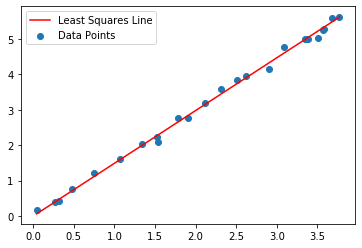

In [54]:
import numpy as np
from matplotlib import pyplot as plt

# Set random seed.
np.random.seed(636)
# Generate 25 values from a uniform (-2,2) distribution as x.
x = np.sort(4*np.random.rand(25,1),axis=0)
# Generate y = 1.5x + 0.1e, where e is the error term from normal(0,1).
y = 1.5 * x + 0.1 * np.random.randn(25,1)

# Apply least squares to get the regression slope.
m2 = np.linalg.lstsq(x, y, rcond=None)[0]
m2 = m2.item(0)

# Plot the generated x and y.
plt.scatter(x, y, label='Data Points')
plt.plot(x, m2*x, color='r', label='Least Squares Line')
plt.legend()
plt.show()

### 1.2
Change the last value of y to -5 to create an outlier and repeat the previous steps. Note how the least squares line is affected.

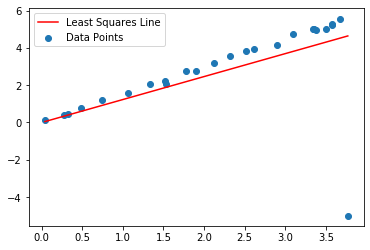

In [55]:
y2 = y.copy()
y2[-1] = -5
m2 = np.linalg.lstsq(x, y2, rcond=None)[0]
m2 = m2.item(0)
plt.scatter(x, y2, label='Data Points')
plt.plot(x, m2*x, color='r', label='Least Squares Line')
plt.legend()
plt.show()

### 1.3
Now instead of least squares, apply robust L1-norm regression to reduce outlier influence. 

- Calculate $m$ minimizing $\lVert mx-y \rVert_1$ and use it to define a regression line. You may employ [scipy.optimize.minimize()](https://docs.scipy.org/doc/scipy-1.8.0/html-scipyorg/reference/generated/scipy.optimize.minimize.html).
- Plot the resulting regression line and compare to the least squares line.

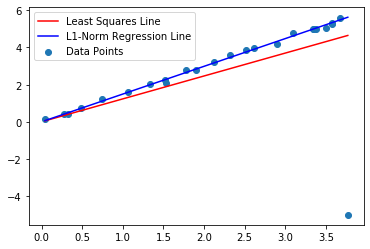

In [56]:
from scipy.optimize import minimize

# Objective.
def L1(m):
    return np.linalg.norm(m*x-y, ord=1)

seed = m2
m1 = minimize(L1, seed).x[0]
plt.scatter(x, y2, label='Data Points')
plt.plot(x, m2*x, color='r', label='Least Squares Line')
plt.plot(x, m1*x, color='b', label='L1-Norm Regression Line')
plt.legend()
plt.show()

## 2. Iterative Robust Estimation

### 2.1
Change the outlier y-value to be -100. Print the mean of y without the outlier, and the mean of y with the outlier.

In [51]:
y3 = y.copy()
y3[-1] = -100
print(y3.mean(), y3[:-1].mean())

-0.9560727741935057 3.170757526881765


### 2.2
- Run iterative robust estimation for the location of y using a _bisquare weight function_:
$$W(t) = \begin{cases} \left(1 - \left(\frac{t}{k}\right)^{2}\right)^{2} & \text{if $\lvert t \rvert \leq k$}\\ 0 & \text{otherwise} \end{cases}$$
- Plot the estimates at each iteration. 
- Try different values of k in the weight function to see how they affect convergence.

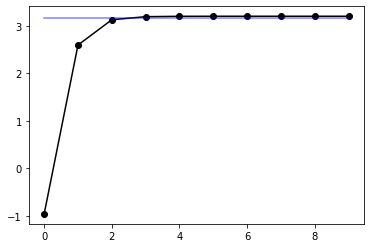

In [85]:
def Wbsq(t, k): # Bisquare weight function.
    w = np.zeros(t.shape)
    abst = np.abs(t)
    i = (abst <= k)
    w[i] = (1 - (t[i]/k)**2)**2
    return w

# Iterate for a robust location estimate.
mu, w = [], np.ones_like(y3)
# Set k.
k = 10
for _ in range(10):
    m = sum(w*y3) / sum(w)
    mu.append(m) 
    w = Wbsq(y3-m, k=k)

plt.plot(mu,'ko-'); 
plt.plot(y3[:-1].mean()*np.ones_like(mu), 'b-', alpha=0.5); 